In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

# **Data Preprocessing**

In [53]:
df = pd.read_excel('new_dataset.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [54]:
df.shape

(5000, 8)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 312.6+ KB


In [56]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,5000.000000,5000,5000.000000,3795.000000
mean,9.185800,2010-12-01 22:54:10.812000,3.792314,15906.281950
min,-9360.000000,2010-12-01 08:26:00,0.000000,12431.000000
25%,1.000000,2010-12-01 13:24:00,1.250000,14606.000000
50%,3.000000,2010-12-01 17:06:00,2.510000,15862.000000
75%,10.000000,2010-12-02 12:10:00,4.210000,17841.000000
max,2880.000000,2010-12-02 18:08:00,607.490000,18239.000000
std,144.940788,NaN,13.211720,1732.068892


In [57]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,12
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,1205
Country,0


In [58]:
df = df.dropna(subset=['Description'])
df_customer = df.dropna(subset=['CustomerID'])

In [59]:
df_customer = df_customer[(df_customer['Quantity']>0) & (df_customer['UnitPrice']>0)]

In [60]:
df_customer['InvoiceNo'] = df_customer['InvoiceNo'].astype(str)
df_customer = df_customer[~df_customer['InvoiceNo'].str.contains('C', na=False)]

In [61]:
df.isnull().sum()
df.shape

(4988, 8)

# **Feature Extraction**

In [62]:
basket = (df_customer.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket_binary = basket.applymap(lambda x:1 if x>0 else 0)
basket_binary.head()

Description,4 PURPLE FLOCK DINNER CANDLES,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,"WRAP, BILLBOARD FONTS DESIGN",YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC FINISH 15CM PLANTER POTS,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Rows:** Each row corresponds to an invoice, identified by InvoiceNo.

**Columns:** Each column corresponds to a unique product description.

**Values:** The value in each cell is the quantity of the corresponding product in the corresponding invoice. If a product wasn't purchased in a particular invoice, the value is 0.


# **Visualization**

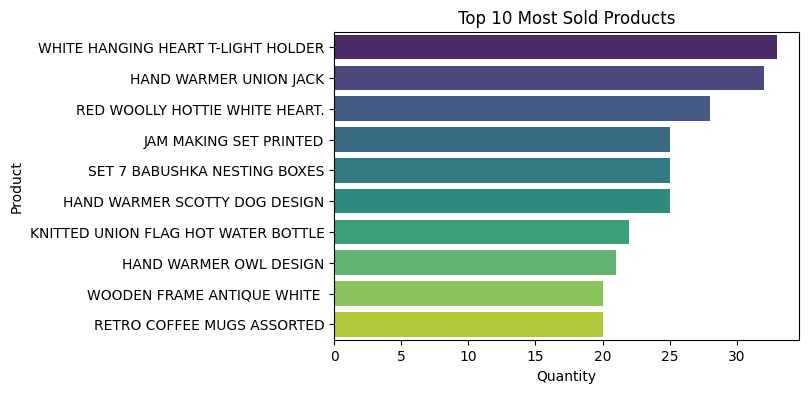

In [63]:
#Top 10 Most Sold Products
top_products = df_customer['Description'].value_counts().head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.title('Top 10 Most Sold Products')
plt.show()

Text(0.5, 1.0, 'Top 10 Most Profitable Products')

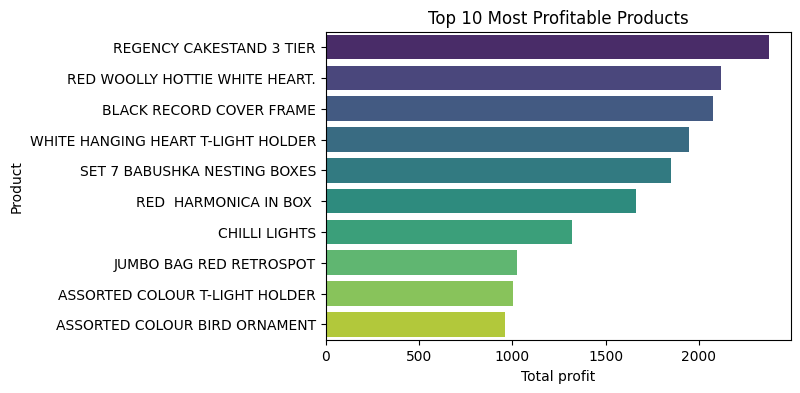

In [68]:
#Top 10 Most Profitable Products
df_customer['InvoiceDate'] = pd.to_datetime(df_customer['InvoiceDate'])
top_profitable_products = df_customer.groupby('Description')['TotalSum'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top_profitable_products.values, y=top_profitable_products.index, palette='viridis')
plt.ylabel('Product')
plt.xlabel('Total profit')
plt.title('Top 10 Most Profitable Products')

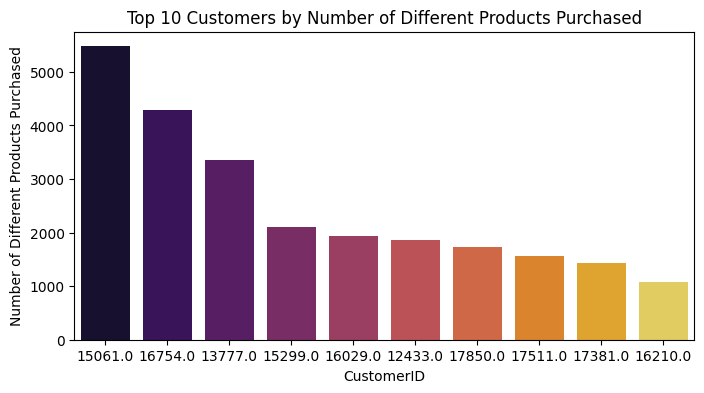

In [69]:
# Plot the top customers by the variety of products purchased
customer_basket = df_customer.groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().fillna(0)
top_customers = customer_basket.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='inferno')
plt.title('Top 10 Customers by Number of Different Products Purchased')
plt.xlabel('CustomerID')
plt.ylabel('Number of Different Products Purchased')
plt.show()

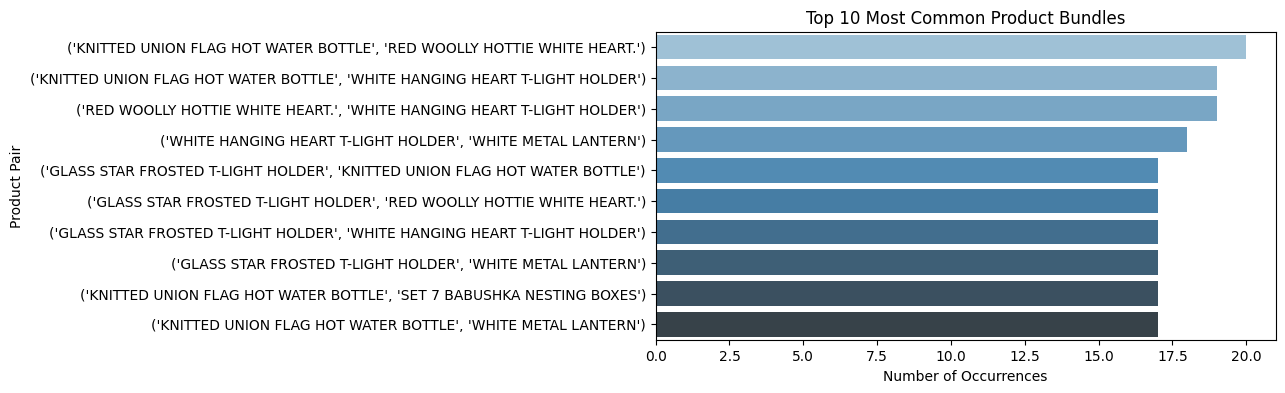

In [70]:
#Top 10 Most Common Product Bundles

#Generate pairs of products that appear in the same invoice
product_pairs = []

for invoice in basket_binary.index:
    products = basket_binary.loc[invoice]
    purchased_products = products[products > 0].index.tolist()
    product_pairs.extend(list(combinations(purchased_products, 2)))

# Count the most common pairs
product_pair_counts = Counter(product_pairs)
common_product_pairs = product_pair_counts.most_common(10)

# Convert to DataFrame for easier plotting
common_product_pairs_df = pd.DataFrame(common_product_pairs, columns=['Product Pair', 'Count'])

# Convert the 'Product Pair' column to a string representation
common_product_pairs_df['Product Pair'] = common_product_pairs_df['Product Pair'].astype(str)

# Plot the top 10 product pairs
plt.figure(figsize=(8,4))
sns.barplot(x='Count', y='Product Pair', data=common_product_pairs_df, palette='Blues_d')
plt.title('Top 10 Most Common Product Bundles')
plt.xlabel('Number of Occurrences')
plt.ylabel('Product Pair')
plt.show()


# **Determining Optimal Number of Clusters**

In [72]:
# Applying PCA(Principal Component Analysis) for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(basket_binary)

**Elbow Method**

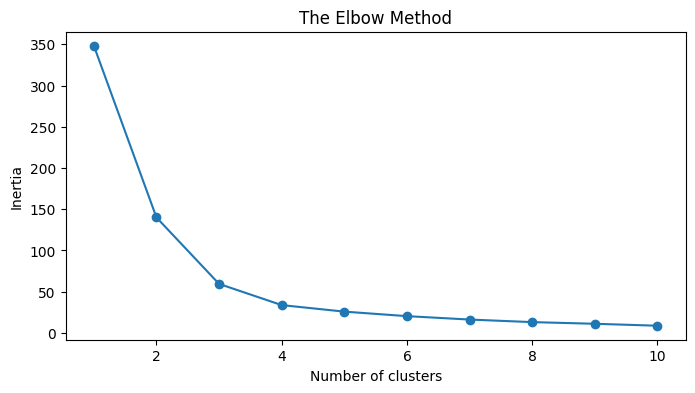

In [73]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

**Silhouette Score**

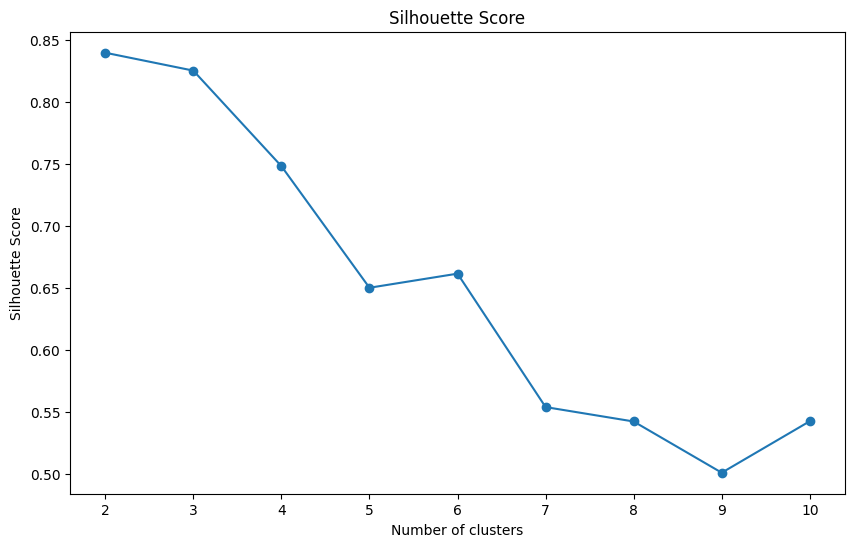

In [74]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

**Combining insights from both the Elbow Method and the Silhouette Score: *3* clusters might be the best choice**

# **Model Building**

**K-means** **Clustering**

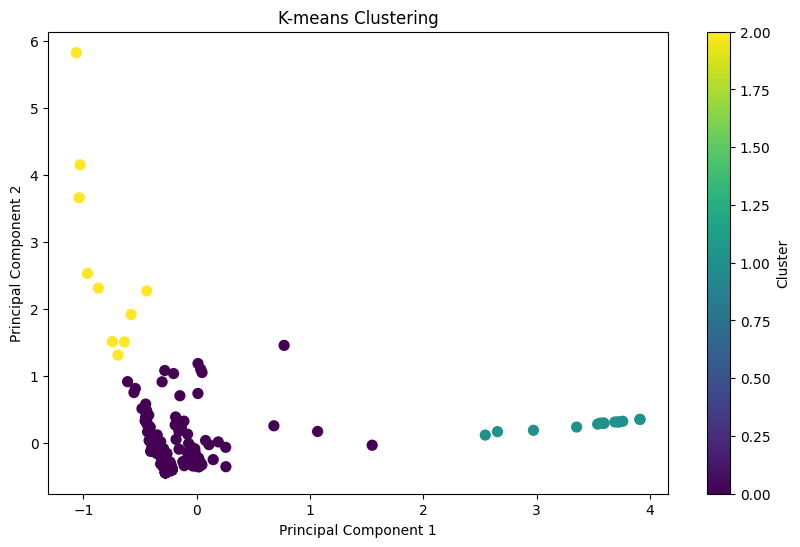

In [79]:
#Applying K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_kmeans = kmeans.fit_predict(pca_result)

basket['Cluster_Kmeans'] = cluster_kmeans

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=cluster_kmeans, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

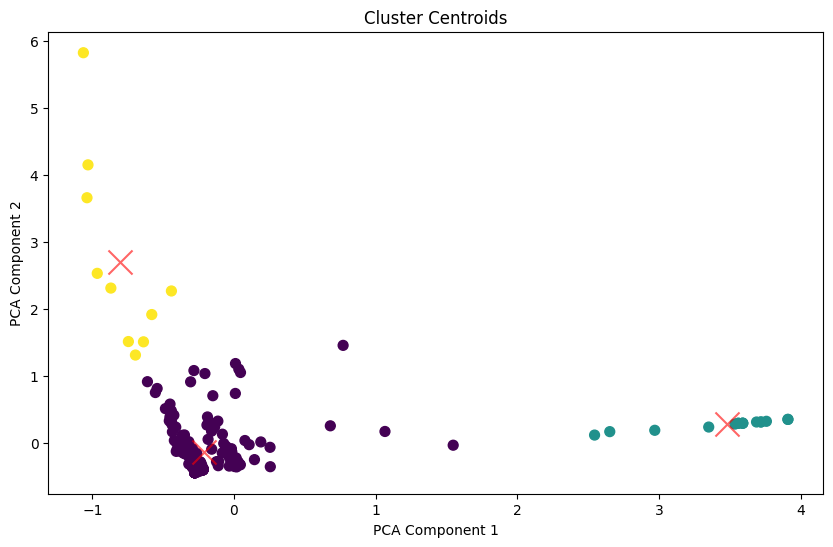

In [80]:
# Find the centroid of each cluster
centroids = kmeans.cluster_centers_

# Visualize centroids
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_kmeans, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.6, marker='x')
plt.title('Cluster Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [81]:
# Display the clusters with product descriptions for K-means
cluster_summary_kmeans = basket.groupby('Cluster_Kmeans').mean()
print("K-means Clustering Results:")
print(cluster_summary_kmeans.head(10))


K-means Clustering Results:
Description      4 PURPLE FLOCK DINNER CANDLES  \
Cluster_Kmeans                                   
0                                     0.009009   
1                                     0.000000   
2                                     0.000000   

Description      SET 2 TEA TOWELS I LOVE LONDON   10 COLOUR SPACEBOY PEN  \
Cluster_Kmeans                                                             
0                                       0.166667                0.765766   
1                                       0.000000                0.000000   
2                                       0.800000                1.200000   

Description     12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
Cluster_Kmeans                                                          
0                                 0.045045                        0.0   
1                                 0.000000                        0.0   
2                                 0.000000      

**Agglomerative Clustering**

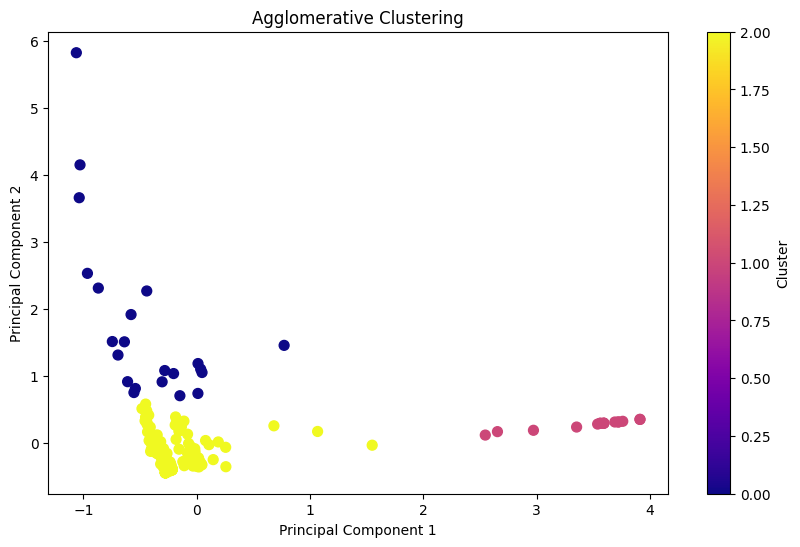

In [83]:
agglo = AgglomerativeClustering(n_clusters=3)
cluster_agglo = agglo.fit_predict(pca_result)

basket['Cluster_Agglo'] = cluster_agglo

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_agglo, cmap='plasma', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [84]:
# Display the clusters with product descriptions for Agglomerative Clustering
cluster_summary_agglo = basket.groupby('Cluster_Agglo').mean()
print("\nAgglomerative Clustering Results:")
print(cluster_summary_agglo.head(10))


Agglomerative Clustering Results:
Description     4 PURPLE FLOCK DINNER CANDLES  \
Cluster_Agglo                                   
0                                    0.090909   
1                                    0.000000   
2                                    0.000000   

Description     SET 2 TEA TOWELS I LOVE LONDON   10 COLOUR SPACEBOY PEN  \
Cluster_Agglo                                                             
0                                      0.500000                1.636364   
1                                      0.000000                0.000000   
2                                      0.161905                0.695238   

Description    12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
Cluster_Agglo                                                          
0                                0.000000                   0.363636   
1                                0.000000                   0.000000   
2                                0.047619              

# **Final Insights from Cluster Analysis**

 **Cluster Overview**

***Cluster 0 :***  High-Selling Products

Characteristics : This cluster includes products that are purchased in large quantities and typically have a higher unit price. These products are likely bestsellers, driving significant revenue for the company.

Strategy : Focus marketing efforts on maintaining the popularity of these products. Consider upselling and cross-selling strategies to maximize revenue. Also, ensure adequate stock levels to meet demand.

***Cluster 1 :*** Medium-Selling Products

Characteristics : Products in this cluster are moderately popular, with average quantities and unit prices. They likely represent standard, regularly purchased items.

Strategy : These products could benefit from seasonal promotions or bundling with high-selling items to boost sales. Analyze trends over time to identify potential for growth.

***Cluster 2 :*** Low-Selling Products

Characteristics : This cluster contains products with low sales volumes and lower unit prices. These might be niche or seasonal items, or products that have lost customer interest.

Strategy : Reassess the inventory and marketing strategy for these products. Consider discontinuing low-performing items or targeting niche markets where they might be more successful. Alternatively, explore discount strategies to clear out excess inventory.